In [88]:
import pandas as pd
import folium
import random

pd10 = pd.read_csv('충청북도 옥천군_경로당현황_좌표추가.csv')
pd20 = pd.read_csv('충청북도 옥천군_음식점현황_좌표추가.csv') 

In [89]:
pd10

,연번,읍면,경로당명,경로당 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [90]:
pd10 = pd10.rename(columns={"경로당명": "경로당명/음식점명"})
pd10 = pd10.rename(columns={"경로당 주소": "도로명 주소"})
pd10

,연번,읍면,경로당명/음식점명,도로명 주소,Latitude,Longitude,데이터기준일
0,1,옥천읍,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309,2022-06-15
1,2,옥천읍,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444,2022-06-15
2,3,옥천읍,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065,2022-06-15
3,4,옥천읍,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357,2022-06-15
4,5,옥천읍,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288,2022-06-15
...,...,...,...,...,...,...,...
304,305,군북면,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766,2022-06-15
305,306,군북면,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461,2022-06-15
306,307,군북면,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075,2022-06-15
307,308,군북면,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851,2022-06-15


In [91]:
pd10 = pd10.drop("연번", axis=1)
pd10 = pd10.drop("읍면",axis=1)
pd10 = pd10.drop("데이터기준일", axis=1)
pd10

,경로당명/음식점명,도로명 주소,Latitude,Longitude
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.316840,127.581309
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288
...,...,...,...,...
304,안말(국원),충청북도 옥천군 군북면 국원3길 45-2,36.350943,127.585766
305,소정,충청북도 옥천군 군북면 소정2길 1,36.355780,127.596461
306,안말,충청북도 옥천군 군북면 성왕로 1900,36.361852,127.605075
307,막지,충청북도 옥천군 군북면 답양막지길 404,36.374981,127.606851


In [92]:
pd20 = pd20.rename(columns={"업소명": "경로당명/음식점명"})
pd20 = pd20.rename(columns={"소재지(도로명)": "도로명 주소"})
pd20 = pd20[1:].dropna()
pd20

,연번,업종명,군분,경로당명/음식점명,도로명 주소,Latitude,Longitude,소재지(지번),소재지전화,데이터기준일
1,1.0,일반음식점,한식,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976,충청북도 옥천군 군서면 동평리 428-9,043- 732-4009,2022-09-20
2,2.0,일반음식점,한식,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715,충청북도 옥천군 청산면 지전리 162-8,043 -732 -8404,2022-09-20
3,3.0,일반음식점,한식,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842,충청북도 옥천군 옥천읍 금구리 191-41,043- 731-4423,2022-09-20
4,4.0,일반음식점,한식,류 집,NaN,NaN,NaN,충청북도 옥천군 청성면 산계리 203-2,NaN,2022-09-20
5,5.0,일반음식점,식육(숯불구이),한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883,충청북도 옥천군 군서면 동평리 491-4,043 -732 -4005,2022-09-20
...,...,...,...,...,...,...,...,...,...,...
932,932.0,휴게음식점,커피숍,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875,충청북도 옥천군 동이면 남곡리 360-1,NaN,2022-09-20
933,933.0,휴게음식점,기타 휴게음식점,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089,충청북도 옥천군 군서면 상지리 9-5,NaN,2022-09-20
934,934.0,휴게음식점,커피숍,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771,충청북도 옥천군 옥천읍 문정리 386-8,NaN,2022-09-20
935,935.0,휴게음식점,기타 휴게음식점,대한민국 푸드트럭 협회,충청북도 옥천군 옥천읍 금장로 109,36.2981391,127.5747411,충청북도 옥천군 옥천읍 금구리 97-8,NaN,2022-09-20


In [93]:
pd20 = pd20.drop("연번", axis=1)
pd20 = pd20.drop("업종명", axis=1)
pd20 = pd20.drop("군분", axis=1)
pd20 = pd20.drop("소재지(지번)",axis=1)
pd20 = pd20.drop("소재지전화", axis=1)
pd20 = pd20.drop("데이터기준일", axis=1)
pd20 = pd20[:-1]
pd20

,경로당명/음식점명,도로명 주소,Latitude,Longitude
1,중앙집,충청북도 옥천군 군서면 동평4길 4,36.2724864,127.5271976
2,선광집,충청북도 옥천군 청산면 지전2길 14,36.3461465,127.7893715
3,별미올갱이,충청북도 옥천군 옥천읍 삼금로2길 3-1,36.300024,127.5662842
4,류 집,NaN,NaN,NaN
5,한양식당,충청북도 옥천군 군서면 동평1길 7-3,36.2781755,127.5282883
...,...,...,...,...
931,비움과한끼식사 카페 옥천점,충청북도 옥천군 군북면 감로길 18,36.3484533,127.5303483
932,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875
933,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089
934,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771


In [94]:
def merge_dataframes(pd10, pd20):
    # 두 데이터프레임을 합침
    merged_df = pd.concat([pd10, pd20], ignore_index=True)
    return merged_df

merged_df = merge_dataframes(pd10, pd20)
merged_df

,경로당명/음식점명,도로명 주소,Latitude,Longitude
0,죽향1,충청북도 옥천군 옥천읍 향수2길 46-11,36.31684,127.581309
1,죽향2,"충청북도 옥천군 옥천읍 성왕로 1274, 옥향@",36.317056,127.578444
2,죽향3,"충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101",36.316055,127.578065
3,문정1,충청북도 옥천군 옥천읍 향수2길 9,36.313722,127.579357
4,문정2,충청북도 옥천군 옥천읍 문정2길 13-15,36.305198,127.573288
...,...,...,...,...
1239,비움과한끼식사 카페 옥천점,충청북도 옥천군 군북면 감로길 18,36.3484533,127.5303483
1240,우슬초,충청북도 옥천군 동이면 선사로 50,36.3124454,127.6103875
1241,향 스토리,충청북도 옥천군 군서면 성왕로 240,36.2798552,127.5287089
1242,업스테어,"충청북도 옥천군 옥천읍 관성로 50, 2층",36.301962,127.5722771


In [95]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청성면"이 포함된 행을 뽑음
merged_df_청성면 = merged_df[merged_df["도로명 주소"].str.contains("청성면")]

# 필터링된 데이터프레임 출력
print(merged_df_청성면)

merged_df_청성면.shape[0]

    경로당명/음식점명                    도로명 주소    Latitude    Longitude
152       산계1       충청북도 옥천군 청성면 산계길 42   36.326509    127.75988
153       산계2       충청북도 옥천군 청성면 산계길 81   36.329771   127.759482
154       산계3     충청북도 옥천군 청성면 산계2길 102   36.326332   127.751453
155        거포       충청북도 옥천군 청성면 거포3길 8   36.331178   127.737249
156        상포      충청북도 옥천군 청성면 거포2길 17   36.333988   127.739122
157        만명     충청북도 옥천군 청성면 장수로1길 44   36.314311   127.745618
158        무회   충청북도 옥천군 청성면 장수로2길 36-1   36.306055   127.735433
159        점동    충청북도 옥천군 청성면 장수로 552-3   36.323139    127.72443
160        궁촌     충청북도 옥천군 청성면 궁촌길 19-2   36.308841   127.757607
161        서평       충청북도 옥천군 청성면 소서길 34   36.315823   127.771553
162        소서      충청북도 옥천군 청성면 소서길 243   36.300902   127.774968
163        삼남      충청북도 옥천군 청성면 삼남1길 23   36.296036   127.753983
164       삼거리    충청북도 옥천군 청성면 삼남2길 90-1   36.286519   127.741908
165        조천      충청북도 옥천군 청성면 조천길 213   36.283159   127.757789
166        묘동     충청북도 옥천

49

In [96]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "청산면"이 포함된 행을 뽑음
merged_df_청산면 = merged_df[merged_df["도로명 주소"].str.contains("청산면")]

# 필터링된 데이터프레임 출력
print(merged_df_청산면)

merged_df_청산면.shape[0]

        경로당명/음식점명                      도로명 주소    Latitude    Longitude
191            백운       충청북도 옥천군 청산면 백운길 20-7   36.349032    127.79315
192            분회      충청북도 옥천군 청산면 지전길 32-13   36.345481   127.793974
193            지전        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
194          지전여자        충청북도 옥천군 청산면 지전2길 27   36.346786   127.790584
195            교평         충청북도 옥천군 청산면 교평길 26   36.345055   127.797313
...           ...                         ...         ...          ...
1192         호수다방          충청북도 옥천군 청산면 교평길 5  36.3446663  127.7949827
1200        카페시우시   충청북도 옥천군 청산면 지전길 16, 보험회사  36.3443574  127.7950386
1202         청산이레  충청북도 옥천군 청산면 지전길 35, 청산농약사  36.3451648  127.7932741
1224  세븐일레븐 옥천청산점  충청북도 옥천군 청산면 지전길 46, 주택 1층  36.3456675  127.7922237
1227          찐다방       충청북도 옥천군 청산면 지전길 32-5  36.3453741  127.7937054

[91 rows x 4 columns]


91

In [97]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "동이면"이 포함된 행을 뽑음
merged_df_동이면 = merged_df[merged_df["도로명 주소"].str.contains("동이면")]

# 필터링된 데이터프레임 출력
print(merged_df_동이면)

merged_df_동이면.shape[0]

           경로당명/음식점명                   도로명 주소    Latitude    Longitude
74                상촌     충청북도 옥천군 동이면 평산2길 28    36.28493   127.614256
75                평촌      충청북도 옥천군 동이면 평산길 41   36.283151   127.616616
76                소도   충청북도 옥천군 동이면 평산1길 31-1   36.288463   127.617609
77                용운      충청북도 옥천군 동이면 세산2길 6   36.271285   127.604855
78                용암     충청북도 옥천군 동이면 세산2길 74   36.265706    127.60576
...              ...                      ...         ...          ...
1118  (주)금강휴게소(하행4호)     충청북도 옥천군 동이면 금강로 596  36.2789444  127.6720992
1181           강대박카페    충청북도 옥천군 동이면 옥천로 2286  36.2695485  127.6188148
1188     지에스25 동이나래점  충청북도 옥천군 동이면 세산1길 2, 공장  36.2711121  127.6037134
1210            들꽃향기     충청북도 옥천군 동이면 우산로 436  36.2783092  127.6814393
1240             우슬초      충청북도 옥천군 동이면 선사로 50  36.3124454  127.6103875

[83 rows x 4 columns]


83

In [98]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군북면"이 포함된 행을 뽑음
merged_df_군북면 = merged_df[merged_df["도로명 주소"].str.contains("군북면")]

# 필터링된 데이터프레임 출력
print(merged_df_군북면)

merged_df_군북면.shape[0]

           경로당명/음식점명                     도로명 주소    Latitude    Longitude
280              이백1      충청북도 옥천군 군북면 이백3길15-7    36.33009   127.531993
281              이백2     충청북도 옥천군 군북면 이백1길 3-18   36.328975   127.536487
282               자모     충청북도 옥천군 군북면 자모2길 20-1   36.330033   127.513362
283             윗자모리     충청북도 옥천군 군북면 자모길 186-1   36.323897   127.509559
284               증약     충청북도 옥천군 군북면 증약1길 10-7   36.338679   127.516158
...              ...                        ...         ...          ...
1184      밸리(Valley)      충청북도 옥천군 군북면 추소길 8-41  36.3473014   127.558122
1204           카페대장간   충청북도 옥천군 군북면 비야대정로 176-9  36.3440326  127.5262923
1205          그레이스푸드  충청북도 옥천군 군북면 옥천로 1120, 2호  36.3304739  127.5345728
1206       미니스톱 과수원점    충청북도 옥천군 군북면 옥천로 1104-1  36.3313605  127.5331945
1239  비움과한끼식사 카페 옥천점        충청북도 옥천군 군북면 감로길 18  36.3484533  127.5303483

[99 rows x 4 columns]


99

In [99]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "군서면"이 포함된 행을 뽑음
merged_df_군서면 = merged_df[merged_df["도로명 주소"].str.contains("군서면")]

# 필터링된 데이터프레임 출력
print(merged_df_군서면)

merged_df_군서면.shape[0]

     경로당명/음식점명                         도로명 주소    Latitude    Longitude
259         동산            충청북도 옥천군 군서면 동평1길 7   36.278018   127.528592
260       동산여자           충청북도 옥천군 군서면 동평1길 20   36.278807   127.529455
261         평곡          충청북도 옥천군 군서면 동평4길 9-8   36.273008   127.527831
262         증산         충청북도 옥천군 군서면 금산1길 20-3   36.268873    127.53389
263         금천           충청북도 옥천군 군서면 금산3길 23   36.250688   127.546922
264         사정            충청북도 옥천군 군서면 사정4길 3   36.261041   127.520473
265         향정         충청북도 옥천군 군서면 사정1길 18-5   36.266456   127.525239
266         상지          충청북도 옥천군 군서면 상지1길 8-4   36.254064   127.512072
267         은행         충청북도 옥천군 군서면 은행1길 23-6   36.270182    127.51667
268         상은           충청북도 옥천군 군서면 은행3길 45   36.264786   127.516104
269         사양            충청북도 옥천군 군서면 사양2길 4   36.274107   127.500121
270         상중            충청북도 옥천군 군서면 상중길 92   36.288433   127.518328
271         신대           충청북도 옥천군 군서면 상중1길 17   36.286622    127.52272
272   

55

In [100]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안남면"이 포함된 행을 뽑음
merged_df_안남면 = merged_df[merged_df["도로명 주소"].str.contains("안남면")]

# 필터링된 데이터프레임 출력
print(merged_df_안남면)

merged_df_안남면.shape[0]

      경로당명/음식점명                         도로명 주소    Latitude    Longitude
106          연주            충청북도 옥천군 안남면 연주2길 9   36.356816   127.674667
107         독락정           충청북도 옥천군 안남면 연주길 150   36.348656   127.667064
108          중촌            충청북도 옥천군 안남면 연주길 70   36.354234   127.672167
109          미산          충청북도 옥천군 안남면 종미3길 106   36.340797   127.670281
110          종배           충청북도 옥천군 안남면 종미1길 41   36.344524   127.674169
111          진벌        충청북도 옥천군 안남면 지수1길 212-1    36.34122   127.683862
112          모산            충청북도 옥천군 안남면 지수2길 6   36.346007   127.689493
113     지수2(수동)           충청북도 옥천군 안남면 안남로 919   36.323404   127.683358
114     잔다리(세교)           충청북도 옥천군 안남면 지수3길 26   36.333318    127.68431
115         서당골           충청북도 옥천군 안남면 도덕2길 64   36.354095   127.682641
116         하서당         충청북도 옥천군 안남면 도덕2길 15-3    36.35406   127.677815
117          도근          충청북도 옥천군 안남면 도덕3길 1-2   36.359542   127.686737
118          덕실           충청북도 옥천군 안남면 도덕1길 85   36.351762   127

33

In [101]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "안내면"이 포함된 행을 뽑음
merged_df_안내면 = merged_df[merged_df["도로명 주소"].str.contains("안내면")]

# 필터링된 데이터프레임 출력
print(merged_df_안내면)

merged_df_안내면.shape[0]

      경로당명/음식점명                       도로명 주소    Latitude    Longitude
129          현1          충청북도 옥천군 안내면 현리길 84   36.394071   127.659849
130         현리2         충청북도 옥천군 안내면 현리5길 15   36.393219   127.648757
131          신촌         충청북도 옥천군 안내면 현리길 131   36.391718   127.655495
132          정곡          충청북도 옥천군 안내면 정방2길 8   36.397312   127.669833
133          방곡         충청북도 옥천군 안내면 정방1길 21   36.393541   127.671764
134          도이          충청북도 옥천군 안내면 도이길 75   36.403573   127.674846
135          동대       충청북도 옥천군 안내면 동대1길 15-2   36.408708   127.669897
136          북대       충청북도 옥천군 안내면 동대5길 39-1     36.4137   127.667821
137         새터말         충청북도 옥천군 안내면 동대4길 19   36.412229   127.671632
138          뱀골         충청북도 옥천군 안내면 서대1길 22   36.408986   127.661627
139          서대         충청북도 옥천군 안내면 방하목로 79   36.411697   127.663806
140         오덕1       충청북도 옥천군 안내면 오덕2길 18-1    36.39251   127.717361
141         오덕2       충청북도 옥천군 안내면 오덕1길 27-4   36.396102   127.695971
142          화인     

52

In [102]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "이원면"이 포함된 행을 뽑음
merged_df_이원면 = merged_df[merged_df["도로명 주소"].str.contains("이원면")]

# 필터링된 데이터프레임 출력
print(merged_df_이원면)

merged_df_이원면.shape[0]

        경로당명/음식점명                    도로명 주소    Latitude    Longitude
225           건진1      충청북도 옥천군 이원면 건진1길 26   36.253751   127.614844
226           건진2      충청북도 옥천군 이원면 건진3길 83   36.248817   127.608167
227            장찬   충청북도 옥천군 이원면 장찬길 376-18   36.245906   127.581417
228           강청1     충청북도 옥천군 이원면 강청4길 7-4   36.241021    127.61073
229           강청2       충청북도 옥천군 이원면 강청길 53   36.244018   127.612999
...           ...                       ...         ...          ...
1159   이마트24옥천이원점      충청북도 옥천군 이원면 묘목로 110  36.2476362  127.6212581
1165  지에스25 옥천이원점      충청북도 옥천군 이원면 묘목로 139  36.2474605  127.6179339
1185         농원딸네  충청북도 옥천군 이원면 묘목로 116, 상점  36.2474734  127.6206261
1212         만나김밥    충청북도 옥천군 이원면 신흥길 8, 상점   36.245933  127.6206424
1232   이원주민쉼터 내일로  충청북도 옥천군 이원면 신흥1길 22, 상점  36.2454913  127.6195414

[89 rows x 4 columns]


89

In [103]:
# NaN 값을 빈 문자열로 대체
merged_df["도로명 주소"].fillna("", inplace=True)

# "소재지(도로명)" 칼럼에서 "옥천읍"이 포함된 행을 뽑음
merged_df_옥천읍 = merged_df[merged_df["도로명 주소"].str.contains("옥천읍")]

# 필터링된 데이터프레임 출력
print(merged_df_옥천읍)

merged_df_옥천읍.shape[0]

         경로당명/음식점명                            도로명 주소    Latitude    Longitude
0              죽향1           충청북도 옥천군 옥천읍 향수2길 46-11    36.31684   127.581309
1              죽향2        충청북도 옥천군 옥천읍 성왕로 1274, 옥향@   36.317056   127.578444
2              죽향3  충청북도 옥천군 옥천읍 성왕로 1262, 향수마을@ 101   36.316055   127.578065
3              문정1               충청북도 옥천군 옥천읍 향수2길 9   36.313722   127.579357
4              문정2           충청북도 옥천군 옥천읍 문정2길 13-15   36.305198   127.573288
...            ...                               ...         ...          ...
1236       씨유옥천역전점                충청북도 옥천군 옥천읍 중앙로 4  36.2982891  127.5664769
1237          와플대학        충청북도 옥천군 옥천읍 중앙로 51-1, 좌측호  36.3018623  127.5691964
1238         꽃차덖는집     충청북도 옥천군 옥천읍 향수길 57, 꽃차덖는집 1층  36.3151055  127.5821633
1242          업스테어           충청북도 옥천군 옥천읍 관성로 50, 2층   36.301962  127.5722771
1243  대한민국 푸드트럭 협회              충청북도 옥천군 옥천읍 금장로 109  36.2981391  127.5747411

[680 rows x 4 columns]


680

In [104]:
import random
import pandas as pd

# merged_df_옥천읍 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_옥천읍["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_옥천읍["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x1_list = []
y1_list = []

for i in range(5330):
    x1_list.append(random.uniform(min_latitude, max_latitude))
    y1_list.append(random.uniform(min_longitude, max_longitude))

target1 = pd.DataFrame({'Latitude': x1_list, 'Longitude': y1_list})
target1

,Latitude,Longitude
0,36.323716,127.584846
1,36.306719,127.602019
2,36.312561,127.586132
3,36.281689,127.583170
4,36.301749,127.580767
...,...,...
5325,36.268833,127.596802
5326,36.285148,127.588343
5327,36.281233,127.592975
5328,36.261085,127.601635


In [105]:
import random
import pandas as pd

# merged_df_이원면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_이원면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_이원면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x2_list = []
y2_list = []

for i in range(1613):
    x2_list.append(random.uniform(min_latitude, max_latitude))
    y2_list.append(random.uniform(min_longitude, max_longitude))

target2 = pd.DataFrame({'Latitude': x2_list, 'Longitude': y2_list})
target2

,Latitude,Longitude
0,36.255600,127.663017
1,36.184353,127.592976
2,36.216126,127.611429
3,36.242524,127.618985
4,36.215933,127.604533
...,...,...
1608,36.195269,127.632371
1609,36.221127,127.616170
1610,36.228147,127.639049
1611,36.192371,127.663832


In [106]:
import random
import pandas as pd

# merged_df_안내면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안내면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안내면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x3_list = []
y3_list = []

for i in range(852):
    x3_list.append(random.uniform(min_latitude, max_latitude))
    y3_list.append(random.uniform(min_longitude, max_longitude))

target3 = pd.DataFrame({'Latitude': x3_list, 'Longitude': y3_list})
target3

,Latitude,Longitude
0,36.422544,127.663276
1,36.386378,127.672584
2,36.364494,127.680959
3,36.423490,127.616938
4,36.427917,127.618067
...,...,...
847,36.360582,127.612032
848,36.420237,127.610965
849,36.380999,127.688927
850,36.365931,127.651344


In [107]:
import random
import pandas as pd

# merged_df_안남면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_안남면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_안남면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x4_list = []
y4_list = []

for i in range(573):
    x4_list.append(random.uniform(min_latitude, max_latitude))
    y4_list.append(random.uniform(min_longitude, max_longitude))

target4 = pd.DataFrame({'Latitude': x4_list, 'Longitude': y4_list})
target4

,Latitude,Longitude
0,36.379157,127.695922
1,36.340725,127.698088
2,36.333076,127.680209
3,36.331784,127.682277
4,36.326329,127.691912
...,...,...
568,36.342956,127.687817
569,36.319526,127.684450
570,36.341833,127.701085
571,36.325270,127.688862


In [108]:
import random
import pandas as pd

# merged_df_군서면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군서면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군서면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x5_list = []
y5_list = []

for i in range(895):
    x5_list.append(random.uniform(min_latitude, max_latitude))
    y5_list.append(random.uniform(min_longitude, max_longitude))

target5 = pd.DataFrame({'Latitude': x5_list, 'Longitude': y5_list})
target5

,Latitude,Longitude
0,36.291784,127.511951
1,36.259533,127.534938
2,36.243894,127.504410
3,36.252985,127.548633
4,36.249854,127.552310
...,...,...
890,36.243308,127.535207
891,36.286739,127.541566
892,36.306548,127.505183
893,36.274856,127.526428


In [109]:
import random
import pandas as pd

# merged_df_군북면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_군북면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_군북면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x6_list = []
y6_list = []

for i in range(1029):
    x6_list.append(random.uniform(min_latitude, max_latitude))
    y6_list.append(random.uniform(min_longitude, max_longitude))

target6 = pd.DataFrame({'Latitude': x6_list, 'Longitude': y6_list})
target6

,Latitude,Longitude
0,36.389003,127.542250
1,36.381518,127.591559
2,36.331846,127.569002
3,36.338525,127.567925
4,36.358392,127.533168
...,...,...
1024,36.347967,127.520189
1025,36.349590,127.540219
1026,36.363315,127.525674
1027,36.388084,127.582025


In [110]:
import random
import pandas as pd

# merged_df_동이면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_동이면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_동이면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x7_list = []
y7_list = []

for i in range(1122):
    x7_list.append(random.uniform(min_latitude, max_latitude))
    y7_list.append(random.uniform(min_longitude, max_longitude))

target7 = pd.DataFrame({'Latitude': x7_list, 'Longitude': y7_list})
target7

,Latitude,Longitude
0,36.267969,127.627481
1,36.312819,127.653352
2,36.279812,127.672871
3,36.268723,127.634321
4,36.312812,127.606131
...,...,...
1117,36.310057,127.648313
1118,36.309182,127.626914
1119,36.267866,127.686541
1120,36.295342,127.666781


In [111]:
import random
import pandas as pd

# merged_df_청산면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청산면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청산면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x8_list = []
y8_list = []

for i in range(1325):
    x8_list.append(random.uniform(min_latitude, max_latitude))
    y8_list.append(random.uniform(min_longitude, max_longitude))

target8 = pd.DataFrame({'Latitude': x8_list, 'Longitude': y8_list})
target8

,Latitude,Longitude
0,36.324024,127.781126
1,36.359036,127.773709
2,36.335231,127.776762
3,36.304947,127.821659
4,36.378194,127.850931
...,...,...
1320,36.371587,127.786954
1321,36.304659,127.783702
1322,36.339251,127.771443
1323,36.361809,127.818502


In [112]:
import random
import pandas as pd

# merged_df_청성면 데이터프레임에서 숫자로 변환할 수 있는 값만 선택
latitude_values = merged_df_청성면["Latitude"].apply(pd.to_numeric, errors='coerce')
longitude_values = merged_df_청성면["Longitude"].apply(pd.to_numeric, errors='coerce')

# NaN 값을 제거한 후 최소값과 최대값 계산
min_latitude = latitude_values.dropna().min()
max_latitude = latitude_values.dropna().max()
min_longitude = longitude_values.dropna().min()
max_longitude = longitude_values.dropna().max()

x9_list = []
y9_list = []

for i in range(1110):
    x9_list.append(random.uniform(min_latitude, max_latitude))
    y9_list.append(random.uniform(min_longitude, max_longitude))

target9 = pd.DataFrame({'Latitude': x9_list, 'Longitude': y9_list})
target9

,Latitude,Longitude
0,36.378625,127.768711
1,36.310142,127.673192
2,36.378380,127.690102
3,36.283294,127.723001
4,36.293749,127.765782
...,...,...
1105,36.296297,127.735602
1106,36.314082,127.751956
1107,36.373484,127.766813
1108,36.322656,127.730537


In [113]:
#target1~9

map_center1 = [target1["Latitude"].mean(), target1["Longitude"].mean()]  # 중앙 좌표 설정

map = folium.Map(location=map_center1, zoom_start=10)  # 중앙 좌표 기준으로 지도 생성

# 랜덤 좌표들을 지도에 마커로 추가
# target1
for lat, lng in zip(target1.Latitude, target1.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='blue',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.5
                       ).add_to(map)
# target2
for lat, lng in zip(target2.Latitude, target2.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target3
for lat, lng in zip(target3.Latitude, target3.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='green',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
# target4
for lat, lng in zip(target4.Latitude, target4.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='white',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.2
                       ).add_to(map)

# target5
for lat, lng in zip(target5.Latitude, target5.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='black',
                        fill=True,
                        fill_color='skyblue',
                        fill_opacity = 0.2
                       ).add_to(map)
# target6
for lat, lng in zip(target6.Latitude, target6.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=2,
                        color='yellow',
                        fill=True,
                        fill_color='pink',
                        fill_opacity = 0.5
                       ).add_to(map)
# target7
for lat, lng in zip(target7.Latitude, target7.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='skyblue',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target8
for lat, lng in zip(target8.Latitude, target8.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='violet',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)
    
# target9
for lat, lng in zip(target9.Latitude, target9.Longitude):
    folium.CircleMarker([lat,lng],
                        radius=3,
                        color='coral',
                        fill=True,
                        fill_color='yellow',
                        fill_opacity = 0.5
                       ).add_to(map)

# 지도를 html 파일로 저장
# map.save('./oc_randnum1_9.html')

In [114]:
# 읍면 난수 데이터 병합
ndf = pd.concat([target1, target2, target3, target4, target5, target6, target7, target8, target9])

ndf.describe()

,Latitude,Longitude
count,13849.000000,13849.000000
mean,36.305539,127.631200
std,0.048915,0.082862
min,36.182734,127.499879
25%,36.275177,127.572362
50%,36.303850,127.606186
75%,36.334539,127.677356
max,36.433122,127.861310


## 기존데이터(경로당+음식점) + 난수 데이터 프레임 병합

In [ ]:
merged_df_옥천읍_target1 = pd.concat([target1, merged_df_옥천읍], ignore_index=True)

merged_df_옥천읍_target1

In [ ]:
merged_df_이원면_target2 = pd.concat([target2, merged_df_이원면], ignore_index=True)

merged_df_이원면_target2

In [ ]:
merged_df_안내면_target3 = pd.concat([target3, merged_df_안내면], ignore_index=True)

merged_df_안내면_target3

In [ ]:
merged_df_안남면_target4 = pd.concat([target4, merged_df_안남면], ignore_index=True)

merged_df_안남면_target4

In [ ]:
merged_df_군서면_target5 = pd.concat([target5, merged_df_군서면], ignore_index=True)

merged_df_군서면_target5

In [ ]:
merged_df_군북면_target6 = pd.concat([target6, merged_df_군북면], ignore_index=True)

merged_df_군북면_target6

In [ ]:
merged_df_동이면_target7 = pd.concat([target7, merged_df_동이면], ignore_index=True)

merged_df_동이면_target7

In [ ]:
merged_df_청산면_target8 = pd.concat([target8, merged_df_청산면], ignore_index=True)

merged_df_청산면_target8

In [ ]:
merged_df_청성면_target9 = pd.concat([target9, merged_df_청성면], ignore_index=True)

merged_df_청성면_target9

# GNN
전체 한번에 clustering 했을 때

In [115]:
#기본 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium

import matplotlib as mpl
import seaborn as sns

import warnings

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [116]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    unique_labels = np.unique(dataframe[label_name].values)
    
    # markers 리스트 길이 조정
    markers=['o', 's', '^', 'x', '*'] * ((len(unique_labels) // 5) + 1)
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['Longitude'], y=label_cluster['Latitude'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

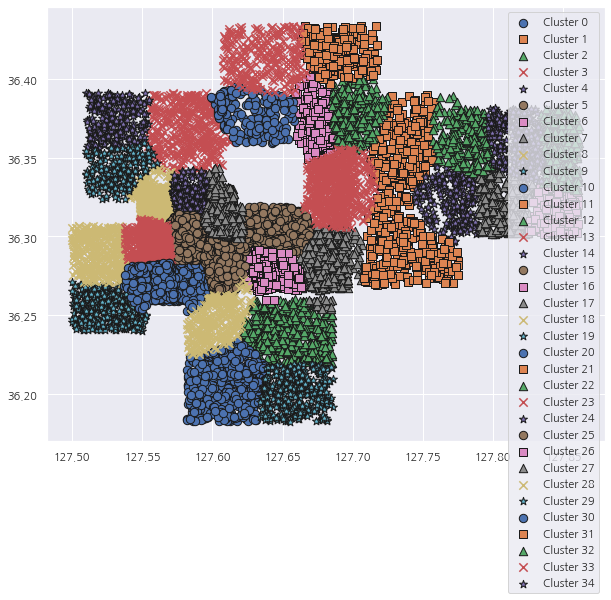

In [117]:
from sklearn.mixture import GaussianMixture

# 군집의 수 35개로 설정
gmm = GaussianMixture(n_components=35, random_state=0)
gmm_cluster_labels = gmm.fit_predict(ndf)

ndf["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, ndf, 'gmm_cluster',iscenter=False)

In [118]:
print('\n Gaussian Mixture Clustering _옥천군 전체')
print(ndf['gmm_cluster'].value_counts().sort_index())


 Gaussian Mixture Clustering _옥천군 전체
0     704
1     217
2     480
3     375
4     241
5     309
6     317
7     403
8     652
9     368
10    502
11    167
12    341
13    568
14    514
15    859
16    222
17    284
18    335
19    354
20    182
21    201
22    227
23    735
24    251
25    946
26    193
27    775
28    311
29    220
30    684
31     95
32    267
33    246
34    304
Name: gmm_cluster, dtype: int64


## 읍/면별로 GNN

### target1 옥천읍

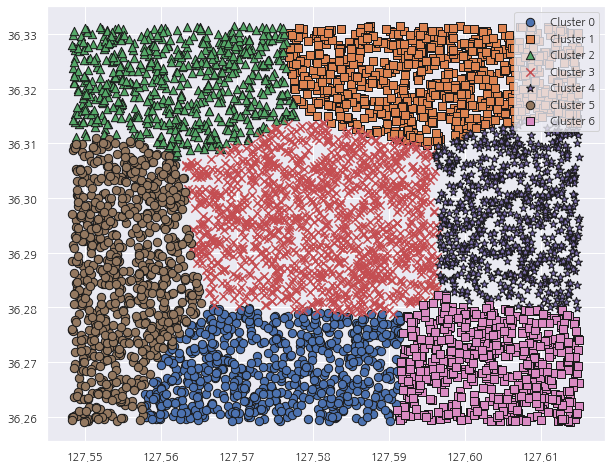


 Gaussian Mixture Clustering_target1 옥천읍
0     659
1     807
2     660
3    1147
4     672
5     821
6     564
Name: gmm_cluster, dtype: int64


In [119]:
from sklearn.mixture import GaussianMixture

# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target1)

target1["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target1, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target1 옥천읍')
print(target1['gmm_cluster'].value_counts().sort_index())

### target2 이원면

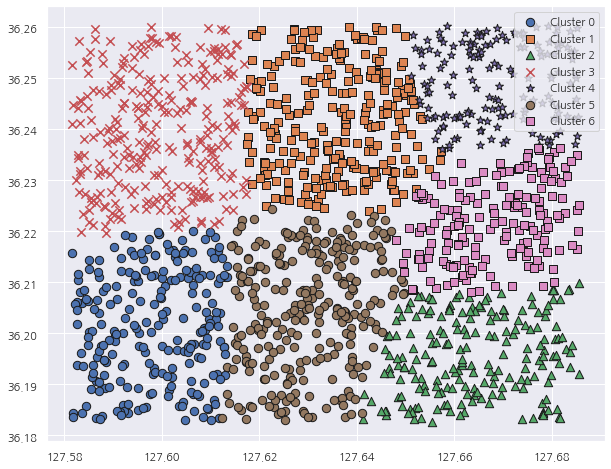


 Gaussian Mixture Clustering_target2 이원면
0    237
1    272
2    202
3    281
4    162
5    280
6    179
Name: gmm_cluster, dtype: int64


In [120]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target2)

target2["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target2, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target2 이원면')
print(target2['gmm_cluster'].value_counts().sort_index())

### target3 안내면

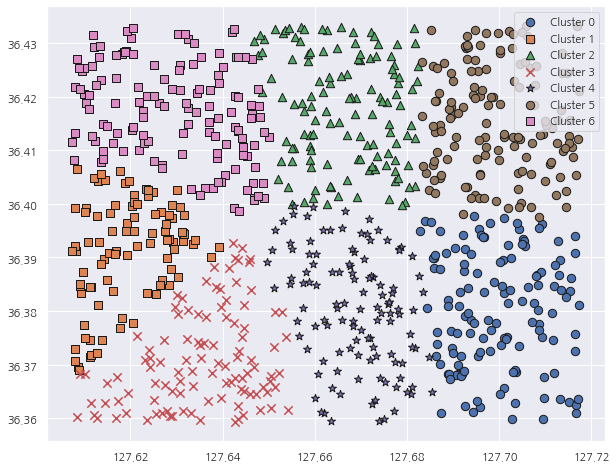


 Gaussian Mixture Clustering_target3 안내면
0    132
1     95
2    126
3    107
4    119
5    139
6    134
Name: gmm_cluster, dtype: int64


In [121]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target3)

target3["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target3, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target3 안내면')
print(target3['gmm_cluster'].value_counts().sort_index())

### target4 안남면

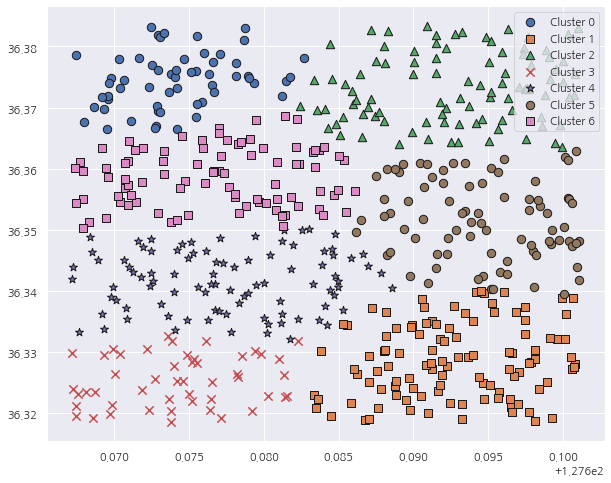


 Gaussian Mixture Clustering_target4 안남면
0     57
1    108
2     95
3     49
4     93
5     82
6     89
Name: gmm_cluster, dtype: int64


In [122]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target4)

target4["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target4, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target4 안남면')
print(target4['gmm_cluster'].value_counts().sort_index())

### target5 군서면

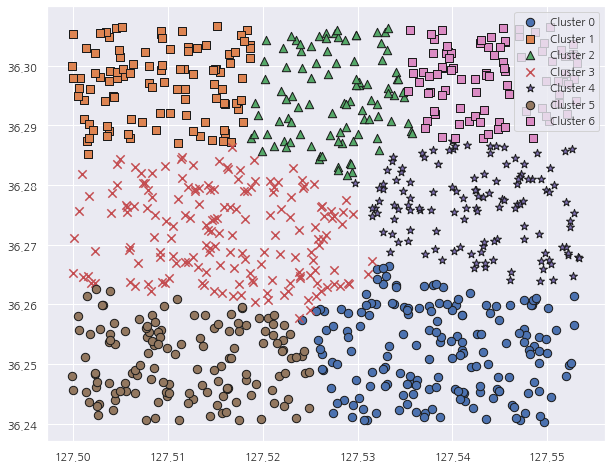


 Gaussian Mixture Clustering_target5 군서면
0    171
1    102
2     97
3    171
4    126
5    136
6     92
Name: gmm_cluster, dtype: int64


In [123]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target5)

target5["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target5, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target5 군서면')
print(target5['gmm_cluster'].value_counts().sort_index())

### target6 군북면
** x좌표 확인 필요, 아마 군집 수 조절해야 할 듯?

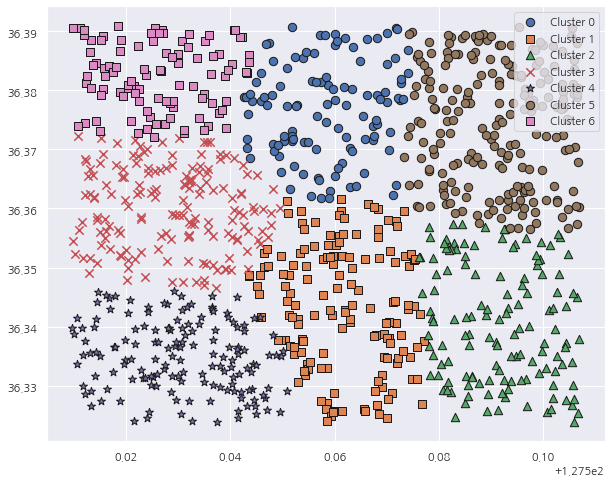


 Gaussian Mixture Clustering_target6 군북면
0    111
1    150
2    135
3    166
4    155
5    212
6    100
Name: gmm_cluster, dtype: int64


In [124]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target6)

target6["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target6, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target6 군북면')
print(target6['gmm_cluster'].value_counts().sort_index())

### target7 동이면

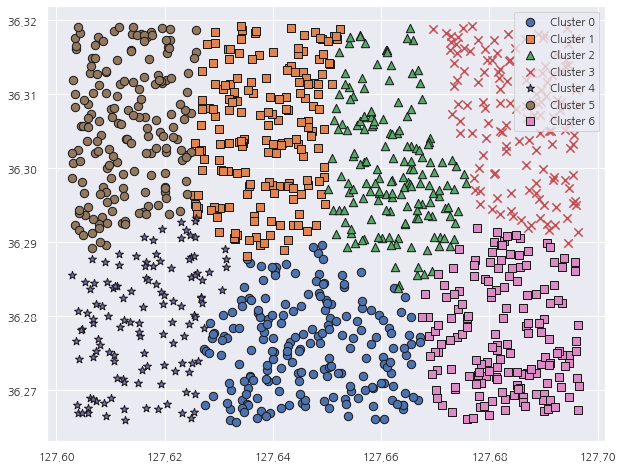


 Gaussian Mixture Clustering_target7 동이면
0    196
1    173
2    164
3    138
4    122
5    169
6    160
Name: gmm_cluster, dtype: int64


In [125]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target7)

target7["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target7, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target7 동이면')
print(target7['gmm_cluster'].value_counts().sort_index())

### target8 청산면

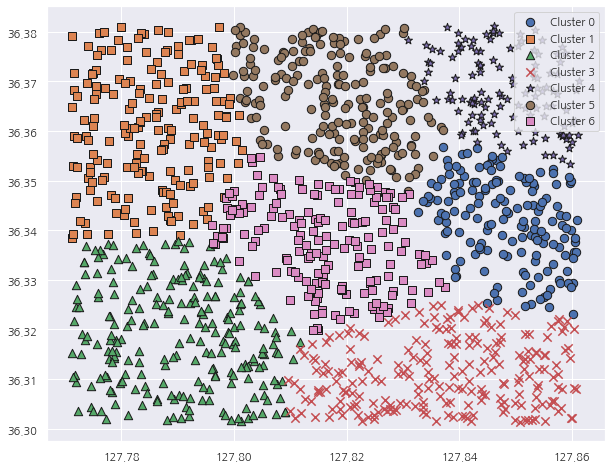


 Gaussian Mixture Clustering_target8 청산면
0    160
1    189
2    239
3    230
4    126
5    204
6    177
Name: gmm_cluster, dtype: int64


In [126]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target8)

target8["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target8, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target8 청산면')
print(target8['gmm_cluster'].value_counts().sort_index())

### target9 청성면

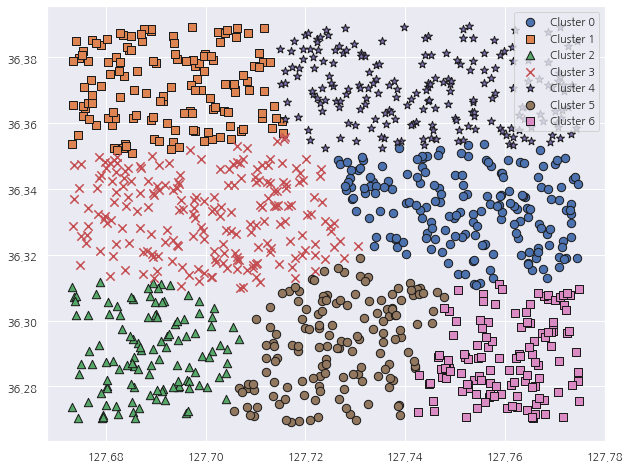


 Gaussian Mixture Clustering_target9 청성면
0    178
1    138
2    116
3    210
4    200
5    145
6    123
Name: gmm_cluster, dtype: int64


In [127]:
# 군집의 수 7개로 설정
gmm = GaussianMixture(n_components=7, random_state=0)
gmm_cluster_labels = gmm.fit_predict(target9)

target9["gmm_cluster"] = gmm_cluster_labels

visualize_cluster_plot(gmm, target9, 'gmm_cluster',iscenter=False)

print('\n Gaussian Mixture Clustering_target9 청성면')
print(target9['gmm_cluster'].value_counts().sort_index())